In [50]:
import pandas as pd
data = pd.read_csv('./data/Sdf16_1a.txt',sep='\t')
math_data = pd.read_csv('./data/Sdf16_1a.txt',sep='\t')
race_data = pd.read_csv('./data/ccd_lea_052_1516_w_1a_011717.csv')
disab_data = pd.read_csv('./data/ccd_lea_002089_1516_w_1a_011717.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Question 1

Since I was cutting off budget for every school evenly by 15%. The proportion for every district should all be 15%. But for the sake of finishing other questions, I decided to use another cutting off strategy, which is only cut fedural fund from school districts with positive profits even without federal fund.

In [23]:
data["NET_PROFIT_WITHOUT_FEDREV"] = data["TOTALREV"] - data["TOTALEXP"] - data["TFEDREV"]
# calculate the total federal revenue made by schools with positive profit.
data_positive_profit_without_fedrev = data[(data["NET_PROFIT_WITHOUT_FEDREV"] > 0) & (data["TFEDREV"] > 0)]
data_negative_profit_without_fedrev = data[(data["NET_PROFIT_WITHOUT_FEDREV"] < 0) | (data["TFEDREV"] < 0)]
#total federal revenue should be cut off
data["TFEDREV"].sum()*0.15
# proportion should be extract from positive net profit without federal revenue

cutoff_proportion = (data["TFEDREV"].sum()*0.15) / data_positive_profit_without_fedrev["TFEDREV"].sum()
print("proportion of cutting off for valid school districts")
print(cutoff_proportion)

proportion of cutting off for valid school districts
0.9981301981980688


In [24]:
data_positive_profit_without_fedrev["CUTOFF"] = data_positive_profit_without_fedrev["TFEDREV"]*cutoff_proportion

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


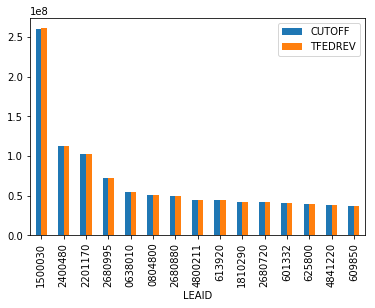

In [29]:
top_cutoff = data_positive_profit_without_fedrev[["LEAID", "CUTOFF", "TFEDREV"]].sort_values(by = "CUTOFF", ascending = False).head(15)
top_cutoff.plot.bar(x = "LEAID")

In [30]:
top_cutoff

,LEAID,CUTOFF,TFEDREV
3306,1500030,2.606427e+08,261131000
6328,2400480,1.125062e+08,112717000
6006,2201170,1.020848e+08,102276000
7676,2680995,7.288247e+07,73019000
2240,0638010,5.471949e+07,54822000
2575,0804800,5.085673e+07,50952000
7665,2680880,5.007819e+07,50172000
15911,4800211,4.516439e+07,45249000
1720,613920,4.442178e+07,44505000
4893,1810290,4.218098e+07,42260000


# Question 2

A common problem with purely data-driven solutions is that they can inadvertently perpetuate hidden
pre-existing biases in the data, and further disadvantage groups that are already disadvantaged.

Calculate the proportion of enrolled students by race for each district, then visualize the distributions of
these for districts that received budget cuts versus districts that did not receive budget cuts.

Comment on whether the the distributions appear to be the same or different. Did your selection include any
hidden biases, or manage to avoid them?

In [34]:
race_data_with_cutoff = pd.merge(data_positive_profit_without_fedrev, race_data, how = "inner", on = "LEAID")[["TOTAL", "AM", 'AS', 
           'HI', 'BL', 'WH', 'HP', 'TR']]
race_data_without_cutoff = pd.merge(data_negative_profit_without_fedrev, race_data, how = "inner", on = "LEAID")[["TOTAL", "AM", 'AS', 
           'HI', 'BL', 'WH', 'HP', 'TR']]

In [37]:
race_data_with_cutoff = race_data_with_cutoff[race_data_with_cutoff["TOTAL"] > 0]
race_data_without_cutoff = race_data_without_cutoff[race_data_without_cutoff["TOTAL"] > 0]

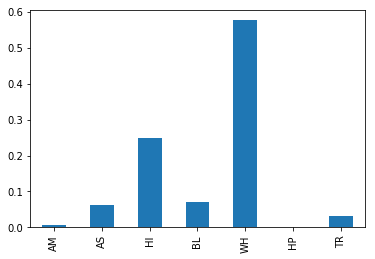

In [47]:
total_student_cutoff = race_data_with_cutoff["TOTAL"].sum()
race_proportion_cutoff = race_data_with_cutoff.sum().drop("TOTAL")/total_student_cutoff
race_proportion_cutoff.plot.bar()

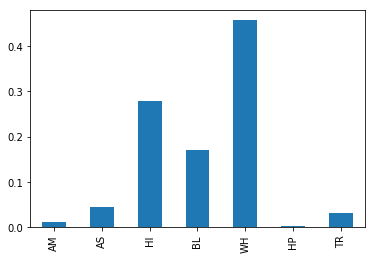

In [48]:
total_student_nocutoff = race_data_without_cutoff["TOTAL"].sum()
race_proportion_nocutoff = race_data_without_cutoff.sum().drop("TOTAL")/total_student_nocutoff
race_proportion_nocutoff.plot.bar()

There is no obvious difference between school which are cut off federal revenue and schools are not cut off  by my strategy in terms of distribution of students' races 

# Question 3

Calculate the proportion of enrolled students by disability status (students with an IEP under IDEA) for each
district, then visualize the distributions of these proportions for districts that received budget cuts versus
districts that did not receive budget cuts.

Comment on whether the the distributions appear to be the same or different. Did your selection include any
hidden biases, or manage to avoid them?

In [51]:
disab_data

,SURVYEAR,FIPST,STABR,STATENAME,SEANAME,LEAID,ST_LEAID,LEA_NAME,SPECED
0,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100002,210,Alabama Youth Services,24
1,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100005,101,Albertville City,267
2,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100006,048,Marshall County,430
3,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100007,158,Hoover City,861
4,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100008,169,Madison City,735
5,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100009,600,Al Inst Deaf And Blind,280
6,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100011,167,Leeds City,171
7,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100012,115,Boaz City,120
8,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100013,205,Trussville City,213
9,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100015,602,SafetyNet Academy,30
